In [19]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies & Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Files to load
energy_contracts_to_load = "/content/drive/MyDrive/ResourcesUCB/clean_contracts.csv"
clean_indices_to_load = "/content/drive/MyDrive/ResourcesUCB/clean_indices.csv"
clean_prices_to_load = "/content/drive/MyDrive/ResourcesUCB/clean_prices.csv"

In [22]:
# Read files & store in pandas DataFrame
energy_contracts_df = pd.read_csv(energy_contracts_to_load)
indices_df = pd.read_csv(clean_indices_to_load)
prices_df = pd.read_csv(clean_prices_to_load)

In [23]:
energy_contracts_df.head()

,Month,naics_description,product_or_service_code_description,total_obligated_amount,recipient_name,funding_sub_agency_name
0,2016M01,ALL OTHER NONMETALLIC MINERAL MINING,"MINERAL CONSTRUCTION MATERIALS, BULK",3127.50,PRIME ONE GENERAL TRADING & CONTRACTING CO. WLL,DEPT OF THE AIR FORCE
1,2016M01,ALL OTHER NONMETALLIC MINERAL MINING,"MINERAL CONSTRUCTION MATERIALS, BULK",3968.67,PRIME ONE GENERAL TRADING & CONTRACTING CO. WLL,DEPT OF THE AIR FORCE
2,2016M01,BITUMINOUS COAL UNDERGROUND MINING,"FUELS, SOLID",351038.45,"DELTA COALS, LLC",DEPT OF THE NAVY
3,2016M01,CONSTRUCTION SAND AND GRAVEL MINING,"BUILDING COMPONENTS, PREFABRICATED",10341.15,MISCELLANEOUS FOREIGN AWARDEES,"STATE, DEPARTMENT OF"
4,2016M01,CONSTRUCTION SAND AND GRAVEL MINING,CONSTRUCTION OF AMMUNITION FACILITIES,140539.74,FOREIGN AWARDEES (UNDISCLOSED),"STATE, DEPARTMENT OF"


In [24]:
indices_df.head()

,Month,Energy,Non_Energy,Agriculture,Agriculture_Beverages,Agriculture_Food,Agriculture_Oils_Meals,Agriculture_Grains,Agriculture_Other_Food,Raw_Materials,Raw_Materials_Timber,Raw_Materials_Other,Fertilizers,Metals_Minerals,Metals_Minerals_Base_Metals,Precious_Metals
0,2016M01,40.86,74.03,82.30,86.05,83.11,77.99,82.77,90.16,78.43,92.15,63.43,90.32,55.21,61.37,84.73
1,2016M02,42.84,74.60,82.53,84.82,83.82,79.84,82.61,90.14,78.26,92.24,62.96,80.30,57.68,63.63,92.31
2,2016M03,48.74,76.99,84.41,88.42,85.85,81.71,82.90,93.96,78.89,92.12,64.42,82.00,61.19,66.46,95.59
3,2016M04,52.28,78.83,86.89,89.81,88.46,86.97,84.31,94.19,81.60,93.21,68.90,81.36,62.00,66.70,96.30
4,2016M05,57.65,79.95,89.62,90.92,92.47,92.40,85.90,98.50,82.05,94.45,68.50,81.09,59.98,65.14,98.12


In [25]:
prices_df.head()

,Month,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African **","Natural gas, US","Natural gas, Europe **","Liquefied natural gas, Japan",Natural gas index,Cocoa,"Coffee, Arabica","Coffee, Robusta","Tea, avg 3 auctions","Tea, Colombo","Tea, Kolkata","Tea, Mombasa",Coconut oil,Groundnuts,Fish meal,Groundnut oil,Palm oil,Palm kernel oil,Soybeans,Soybean oil,Soybean meal,Rapeseed oil,Sunflower oil,Barley,Maize,Sorghum,"Rice, Thai 5%","Rice, Thai 25%","Rice, Thai A.1","Rice, Viet Namese 5%","Wheat, US SRW","Wheat, US HRW","Banana, Europe","Banana, US",Orange,Beef,"Meat, chicken","Meat, sheep","Shrimps, Mexican","Sugar, EU","Sugar, US","Sugar, world","Tobacco, US import u.v.","Logs, Cameroon","Logs, Malaysian","Sawnwood, Cameroon","Sawnwood, Malaysian",Plywood,"Cotton, A Index","Rubber, TSR20","Rubber, SGP/MYS",Phosphate rock,DAP,TSP,Urea,Potassium chloride,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
0,2016M01,29.78,30.80,27.00,31.54,49.02,49.09,2.27,4.40,8.40,54.22,2.95,3.20,1.65,2.55,2.85,2.08,2.72,1152.00,1307.83,1498.60,1359.90,611.63,895.63,373.08,736.03,336.48,781.35,885.35,118.50,161.03,164.91,369.0,361,366.19,364.91,191.73,193.27,0.86,1.04,0.69,3.63,1.85,4.54,10.47,0.35,0.57,0.31,4730.96,380.21,251.76,690.70,785.62,461.78,1.52,1.08,1.23,122.60,327.13,334.00,233.88,301.5,1481.10,41.88,4471.79,1646.20,13808.08,8507.29,1520.36,1097.91,855.25,14.11
1,2016M02,31.03,33.20,29.50,30.39,50.27,50.33,1.96,3.97,8.56,48.43,2.92,3.26,1.63,2.35,2.83,1.75,2.48,1218.93,1280.00,1511.99,1317.26,679.17,986.90,373.75,767.24,323.29,779.88,898.19,114.82,159.68,164.91,384.0,374,377.38,360.13,188.43,187.03,0.93,1.05,0.69,3.86,1.77,4.51,10.80,0.36,0.56,0.29,4670.33,388.43,259.34,685.86,780.11,475.70,1.47,1.10,1.27,114.50,326.00,286.25,191.88,301.5,1531.26,46.83,4598.62,1765.75,15610.14,8298.50,1709.85,1199.50,919.35,15.17
2,2016M03,37.34,39.07,35.18,37.77,52.21,52.57,1.70,3.91,7.74,44.49,3.07,3.47,1.67,2.31,2.87,1.77,2.30,1440.48,1280.00,1443.58,1300.73,715.95,1210.60,380.97,765.61,319.13,766.26,859.19,112.99,159.14,160.50,384.0,375,374.90,360.20,189.69,191.07,0.94,1.01,0.68,4.03,1.85,4.48,10.67,0.36,0.58,0.34,4569.68,388.89,263.62,681.40,775.04,483.53,1.44,1.28,1.46,114.50,338.13,291.25,201.75,301.5,1531.01,56.20,4953.80,1802.19,16897.60,8717.25,1801.69,1245.14,967.73,15.47
3,2016M04,40.75,42.25,39.04,40.96,50.69,52.35,1.90,3.97,6.82,46.63,3.08,3.40,1.77,2.54,2.99,2.51,2.11,1580.95,1294.47,1474.33,1314.38,775.00,1299.05,395.14,794.13,346.19,808.51,875.95,112.53,164.41,162.26,395.0,386,383.53,371.00,192.76,187.39,0.94,0.99,0.71,3.96,1.93,4.56,10.53,0.37,0.62,0.34,4625.00,396.73,271.70,685.76,780.00,498.36,1.53,1.49,1.71,114.13,330.50,295.00,196.25,301.5,1571.23,60.92,4872.74,1732.27,17032.71,8878.86,1855.37,1242.26,994.19,16.36
4,2016M05,45.94,47.13,43.95,46.73,51.31,54.24,1.92,4.33,6.27,48.17,3.10,3.42,1.85,2.57,3.08,2.43,2.21,1439.50,1200.00,1500.81,1322.77,753.42,1218.25,422.55,795.64,421.64,805.59,881.00,112.07,168.96,158.51,433.0,415,414.38,377.31,189.85,171.96,0.93,0.99,0.76,4.04,2.06,4.71,10.47,0.37,0.60,0.38,4680.36,395.82,273.27,696.35,792.05,501.24,1.55,1.36,1.63,110.50,313.50,295.00,198.38,301.5,1550.63,55.13,4694.54,1707.80,16706.95,8660.35,1869.03,1260.95,1035.86,16.95


In [26]:
# look to compare clean_contracts.csv to clean_prices.csv
# combine data into a single dataset
natural_gas_data_df = pd.merge(energy_contracts_df, prices_df, how="left", on=["Month", "Month"])
pd.options.display.max_columns = None
natural_gas_data_df

,Month,naics_description,product_or_service_code_description,total_obligated_amount,recipient_name,funding_sub_agency_name,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African **","Natural gas, US","Natural gas, Europe **","Liquefied natural gas, Japan",Natural gas index,Cocoa,"Coffee, Arabica","Coffee, Robusta","Tea, avg 3 auctions","Tea, Colombo","Tea, Kolkata","Tea, Mombasa",Coconut oil,Groundnuts,Fish meal,Groundnut oil,Palm oil,Palm kernel oil,Soybeans,Soybean oil,Soybean meal,Rapeseed oil,Sunflower oil,Barley,Maize,Sorghum,"Rice, Thai 5%","Rice, Thai 25%","Rice, Thai A.1","Rice, Viet Namese 5%","Wheat, US SRW","Wheat, US HRW","Banana, Europe","Banana, US",Orange,Beef,"Meat, chicken","Meat, sheep","Shrimps, Mexican","Sugar, EU","Sugar, US","Sugar, world","Tobacco, US import u.v.","Logs, Cameroon","Logs, Malaysian","Sawnwood, Cameroon","Sawnwood, Malaysian",Plywood,"Cotton, A Index","Rubber, TSR20","Rubber, SGP/MYS",Phosphate rock,DAP,TSP,Urea,Potassium chloride,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
0,2016M01,ALL OTHER NONMETALLIC MINERAL MINING,"MINERAL CONSTRUCTION MATERIALS, BULK",3127.50,PRIME ONE GENERAL TRADING & CONTRACTING CO. WLL,DEPT OF THE AIR FORCE,29.78,30.8,27.00,31.54,49.02,49.09,2.27,4.40,8.40,54.22,2.95,3.20,1.65,2.55,2.85,2.08,2.72,1152.0,1307.83,1498.60,1359.90,611.63,895.63,373.08,736.03,336.48,781.35,885.35,118.5,161.03,164.91,369.0,361,366.19,364.91,191.73,193.27,0.86,1.04,0.69,3.63,1.85,4.54,10.47,0.35,0.57,0.31,4730.96,380.21,251.76,690.70,785.62,461.78,1.52,1.08,1.23,122.6,327.13,334.00,233.88,301.5,1481.10,41.88,4471.79,1646.2,13808.08,8507.29,1520.36,1097.91,855.25,14.11
1,2016M01,ALL OTHER NONMETALLIC MINERAL MINING,"MINERAL CONSTRUCTION MATERIALS, BULK",3968.67,PRIME ONE GENERAL TRADING & CONTRACTING CO. WLL,DEPT OF THE AIR FORCE,29.78,30.8,27.00,31.54,49.02,49.09,2.27,4.40,8.40,54.22,2.95,3.20,1.65,2.55,2.85,2.08,2.72,1152.0,1307.83,1498.60,1359.90,611.63,895.63,373.08,736.03,336.48,781.35,885.35,118.5,161.03,164.91,369.0,361,366.19,364.91,191.73,193.27,0.86,1.04,0.69,3.63,1.85,4.54,10.47,0.35,0.57,0.31,4730.96,380.21,251.76,690.70,785.62,461.78,1.52,1.08,1.23,122.6,327.13,334.00,233.88,301.5,1481.10,41.88,4471.79,1646.2,13808.08,8507.29,1520.36,1097.91,855.25,14.11
2,2016M01,BITUMINOUS COAL UNDERGROUND MINING,"FUELS, SOLID",351038.45,"DELTA COALS, LLC",DEPT OF THE NAVY,29.78,30.8,27.00,31.54,49.02,49.09,2.27,4.40,8.40,54.22,2.95,3.20,1.65,2.55,2.85,2.08,2.72,1152.0,1307.83,1498.60,1359.90,611.63,895.63,373.08,736.03,336.48,781.35,885.35,118.5,161.03,164.91,369.0,361,366.19,364.91,191.73,193.27,0.86,1.04,0.69,3.63,1.85,4.54,10.47,0.35,0.57,0.31,4730.96,380.21,251.76,690.70,785.62,461.78,1.52,1.08,1.23,122.6,327.13,334.00,233.88,301.5,1481.10,41.88,4471.79,1646.2,13808.08,8507.29,1520.36,1097.91,855.25,14.11
3,2016M01,CONSTRUCTION SAND AND GRAVEL MINING,"BUILDING COMPONENTS, PREFABRICATED",10341.15,MISCELLANEOUS FOREIGN AWARDEES,"STATE, DEPARTMENT OF",29.78,30.8,27.00,31.54,49.02,49.09,2.27,4.40,8.40,54.22,2.95,3.20,1.65,2.55,2.85,2.08,2.72,1152.0,1307.83,1498.60,1359.90,611.63,895.63,373.08,736.03,336.48,781.35,885.35,118.5,161.03,164.91,369.0,361,366.19,364.91,191.73,193.27,0.86,1.04,0.69,3.63,1.85,4.54,10.47,0.35,0.57,0.31,4730.96,380.21,251.76,690.70,785.62,461.78,1.52,1.08,1.23,122.6,327.13,334.00,233.88,301.5,1481.10,41.88,4471.79,1646.2,13808.08,8507.29,1520.36,1097.91,855.25,14.11
4,2016M01,CONSTRUCTION SAND AND GRAVEL MINING,CONSTRUCTION OF AMMUNITION FACILITIES,140539.74,FOREIGN AWARDEES (UNDISCLOSED),"STATE, DEPARTMENT OF",29.78,30.8,27.00,31.54,49.02,49.09,2.27,4.40,8.40,54.22,2.95,3.20,1.65,2.55,2.85,2.08,2.72,1152.0,1307.83,1498.60,1359.90,611.63,895.63,373.08,736.03,336.48,781.35,885.35,118.5,161.03,164.91,369.0,361,366.19,364.91,191.73,193.27,0.86,1.04,0.69,3.63,1.85,4.54,10.47,0.35,0.57,0.31,4730.96,380.21,251.76,690.70,785.62,461.78,1.52,1.08,1.23,122.6,327.13,334.00,233.88,

In [27]:
# get column names from data set
print(natural_gas_data_df.columns)

Index(['Month', 'naics_description', 'product_or_service_code_description',
       'total_obligated_amount', 'recipient_name', 'funding_sub_agency_name',
       'Crude oil, average', 'Crude oil, Brent', 'Crude oil, Dubai',
       'Crude oil, WTI', 'Coal, Australian', 'Coal, South African **',
       'Natural gas, US', 'Natural gas, Europe **',
       'Liquefied natural gas, Japan', 'Natural gas index', 'Cocoa',
       'Coffee, Arabica', 'Coffee, Robusta', 'Tea, avg 3 auctions',
       'Tea, Colombo', 'Tea, Kolkata', 'Tea, Mombasa', 'Coconut oil',
       'Groundnuts', 'Fish meal', 'Groundnut oil', 'Palm oil',
       'Palm kernel oil', 'Soybeans', 'Soybean oil', 'Soybean meal',
       'Rapeseed oil', 'Sunflower oil', 'Barley', 'Maize', 'Sorghum',
       'Rice, Thai 5% ', 'Rice, Thai 25% ', 'Rice, Thai A.1',
       'Rice, Viet Namese 5%', 'Wheat, US SRW', 'Wheat, US HRW',
       'Banana, Europe', 'Banana, US', 'Orange', 'Beef', 'Meat, chicken',
       'Meat, sheep', 'Shrimps, Mexican', 'S

In [28]:
# make summary DataFrame to reduce columns
# columns ["Natural gas, US", ]
natural_gas_data_summary_df = pd.DataFrame({})

# naics stands for North American Industry Classification System

# keep specific columns
natural_gas_data_df1 = natural_gas_data_df[['Month','naics_description','product_or_service_code_description','total_obligated_amount','recipient_name','funding_sub_agency_name','Natural gas, US']]
natural_gas_data_df1

,Month,naics_description,product_or_service_code_description,total_obligated_amount,recipient_name,funding_sub_agency_name,"Natural gas, US"
0,2016M01,ALL OTHER NONMETALLIC MINERAL MINING,"MINERAL CONSTRUCTION MATERIALS, BULK",3127.50,PRIME ONE GENERAL TRADING & CONTRACTING CO. WLL,DEPT OF THE AIR FORCE,2.27
1,2016M01,ALL OTHER NONMETALLIC MINERAL MINING,"MINERAL CONSTRUCTION MATERIALS, BULK",3968.67,PRIME ONE GENERAL TRADING & CONTRACTING CO. WLL,DEPT OF THE AIR FORCE,2.27
2,2016M01,BITUMINOUS COAL UNDERGROUND MINING,"FUELS, SOLID",351038.45,"DELTA COALS, LLC",DEPT OF THE NAVY,2.27
3,2016M01,CONSTRUCTION SAND AND GRAVEL MINING,"BUILDING COMPONENTS, PREFABRICATED",10341.15,MISCELLANEOUS FOREIGN AWARDEES,"STATE, DEPARTMENT OF",2.27
4,2016M01,CONSTRUCTION SAND AND GRAVEL MINING,CONSTRUCTION OF AMMUNITION FACILITIES,140539.74,FOREIGN AWARDEES (UNDISCLOSED),"STATE, DEPARTMENT OF",2.27
...,...,...,...,...,...,...,...
9809,2021M09,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,REPAIR OR ALTERATION OF RESTORATION OF REAL PR...,103769.92,"WYODAK ENERGY SERVICES, LLC",BUREAU OF LAND MANAGEMENT,5.11
9810,2021M09,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,REPAIR OR ALTERATION OF RESTORATION OF REAL PR...,208971.00,"CONTINENTAL INDUSTRIES FIELD SERVICES, LLC",BUREAU OF LAND MANAGEMENT,5.11
9811,2021M09,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,REPAIR OR ALTERATION OF RESTORATION OF REAL PR...,256047.00,WELTER CONSULTING INC,BUREAU OF LAND MANAGEMENT,5.11
9812,2021M09,SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS,REPAIR OR ALTERATION OF RESTORATION OF REAL PR...,343698.00,WELTER CONSULTING INC,BUREAU OF LAND MANAGEMENT,5.11


In [29]:
# unique values from naics_description column
print(pd.unique(natural_gas_data_df1['naics_description']))

['ALL OTHER NONMETALLIC MINERAL MINING'
 'BITUMINOUS COAL UNDERGROUND MINING'
 'CONSTRUCTION SAND AND GRAVEL MINING'
 'CRUDE PETROLEUM AND NATURAL GAS EXTRACTION'
 'CRUSHED AND BROKEN GRANITE MINING AND QUARRYING'
 'CRUSHED AND BROKEN LIMESTONE MINING AND QUARRYING'
 'DIMENSION STONE MINING AND QUARRYING' 'DRILLING OIL AND GAS WELLS'
 'NATURAL GAS LIQUID EXTRACTION'
 'OTHER CHEMICAL AND FERTILIZER MINERAL MINING'
 'OTHER CRUSHED AND BROKEN STONE MINING AND QUARRYING'
 'POTASH, SODA, AND BORATE MINERAL MINING'
 'SUPPORT ACTIVITIES FOR COAL MINING'
 'SUPPORT ACTIVITIES FOR NONMETALLIC MINERALS (EXCEPT FUELS)'
 'SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS' 'INDUSTRIAL SAND MINING'
 'ALL OTHER METAL ORE MINING' 'KAOLIN AND BALL CLAY MINING'
 'SUPPORT ACTIVITIES FOR METAL MINING'
 'BITUMINOUS COAL AND LIGNITE SURFACE MINING'
 'CLAY AND CERAMIC AND REFRACTORY MINERALS MINING'
 'COPPER ORE AND NICKEL ORE MINING' 'PHOSPHATE ROCK MINING'
 'IRON ORE MINING' 'NATURAL GAS EXTRACTION' 'CRUDE PETR

In [30]:
# Relevant NAICS descriptions
# 'CRUDE PETROLEUM AND NATURAL GAS EXTRACTION' 'NATURAL GAS LIQUID EXTRACTION' 'SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS' 'NATURAL GAS EXTRACTION'

In [31]:
print(natural_gas_data_df1.columns)

Index(['Month', 'naics_description', 'product_or_service_code_description',
       'total_obligated_amount', 'recipient_name', 'funding_sub_agency_name',
       'Natural gas, US'],
      dtype='object')


In [32]:
extract_values = ['CRUDE PETROLEUM AND NATURAL GAS EXTRACTION', 'NATURAL GAS LIQUID EXTRACTION', 'SUPPORT ACTIVITIES FOR OIL AND GAS OPERATIONS', 'NATURAL GAS EXTRACTION']

In [33]:
natural_gas_data_df2=natural_gas_data_df1.loc[natural_gas_data_df1['naics_description'].isin(extract_values)]

In [34]:
natural_gas_data_df2['mm'] = natural_gas_data_df2['Month']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
natural_gas_data_df2.columns

Index(['Month', 'naics_description', 'product_or_service_code_description',
       'total_obligated_amount', 'recipient_name', 'funding_sub_agency_name',
       'Natural gas, US', 'mm'],
      dtype='object')

In [36]:
natural_gas_data_df2['yyyy'] = natural_gas_data_df2['Month'].str.split(pat='M').str[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
natural_gas_data_df2['mm'] = natural_gas_data_df2['Month'].str.split(pat='M').str[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
natural_gas_data_df2.to_csv('natural_gas_data_df2.csv')

In [39]:
# unique values from product_or_service_code_description
print(pd.unique(natural_gas_data_df1['product_or_service_code_description']))

['MINERAL CONSTRUCTION MATERIALS, BULK' 'FUELS, SOLID'
 'BUILDING COMPONENTS, PREFABRICATED'
 'CONSTRUCTION OF AMMUNITION FACILITIES'
 'CONSTRUCTION OF AMMUNITION STORAGE BUILDINGS'
 'CONSTRUCTION OF FAMILY HOUSING FACILITIES'
 'CONSTRUCTION OF MAINTENANCE BUILDINGS'
 'CONSTRUCTION OF MISCELLANEOUS BUILDINGS'
 'CONSTRUCTION OF OFFICE BUILDINGS' 'CONSTRUCTION OF OTHER UTILITIES'
 'MATERIAL HANDLING EQUIPMENT, NONSELF-PROPELLED'
 'MISCELLANEOUS CONSTRUCTION EQUIPMENT'
 'MISCELLANEOUS CONSTRUCTION MATERIALS'
 'MISCELLANEOUS MATERIALS HANDLING EQUIPMENT'
 'TRUCKS AND TRUCK TRACTORS, WHEELED' 'GASES: COMPRESSED AND LIQUEFIED'
 'FUEL OILS' 'LEASE OR RENTAL OF EQUIPMENT- SPECIAL INDUSTRY MACHINERY'
 'CHEMICALS' 'LIQUID PROPELLANTS AND FUELS, PETROLEUM BASE'
 'HOUSEKEEPING- SNOW REMOVAL/SALT'
 'INSTALLATION OF EQUIPMENT- CONSTRUCTION AND BUILDING MATERIALS'
 'BEVERAGES, NONALCOHOLIC' 'BEARINGS, ANTIFRICTION, UNMOUNTED'
 'BEARINGS, PLAIN, UNMOUNTED' 'HARDWARE, COMMERCIAL' 'KNOBS AND POINTERS'
 

In [40]:
# Relevant product or service code descriptions
# 'GASES: COMPRESSED AND LIQUEFIED' 'NATURAL RESOURCES/CONSERVATION- WELL DRILLING/EXPLORATORY' 'UTILITIES- GAS' 'LIQUID AND GAS FLOW, LIQUID LEVEL, AND MECHANICAL MOTION MEASURING INSTRUMENTS' 
# 'MAINTENANCE OF FUEL SUPPLY FACILITIES' 'CONSTRUCTION OF EPG FACILITIES - GAS' 'NATURAL RESOURCES/CONSERVATION- SITE PREPARATION' 'REPAIR OR ALTERATION OF FUEL SUPPLY FACILITIES' 'CONSTRUCTION OF FUEL SUPPLY FACILITIES'
# 'R&D- ENERGY: GAS (BASIC RESEARCH)' 'GAS GENERATING AND DISPENSING SYSTEMS, FIXED OR MOBILE' 'REPAIR OR ALTERATION OF EPG FACILITIES - GAS' 'ENERGY R&D SERVICES; EMERGENCY ENERGY PREPAREDNESS; BASIC RESEARCH'

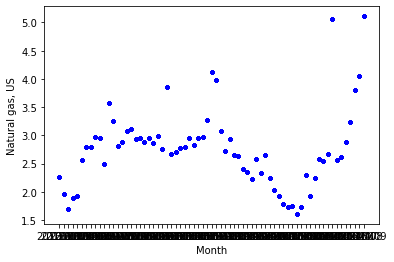

In [41]:
# Month vs Natural Gas Price Scatterplot
natural_gas_data_df1.plot.scatter(x = "Month", y = "Natural gas, US", s = 10, c = "blue")

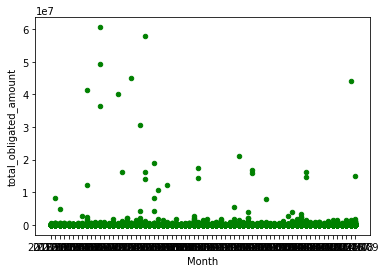

In [42]:
# Month vs Contract Amounts
natural_gas_data_df1.plot.scatter(x = "Month", y = "total_obligated_amount", c='green')

In [43]:
# Month vs Contract Amounts
natural_gas_data_df1.dtypes

Month                                   object
naics_description                       object
product_or_service_code_description     object
total_obligated_amount                 float64
recipient_name                          object
funding_sub_agency_name                 object
Natural gas, US                        float64
dtype: object

In [44]:
natural_gas_data_df1.count()

Month                                  9814
naics_description                      9814
product_or_service_code_description    9814
total_obligated_amount                 9814
recipient_name                         9814
funding_sub_agency_name                9814
Natural gas, US                        9814
dtype: int64

In [45]:
natural_gas_data_df1.isnull().sum()

Month                                  0
naics_description                      0
product_or_service_code_description    0
total_obligated_amount                 0
recipient_name                         0
funding_sub_agency_name                0
Natural gas, US                        0
dtype: int64

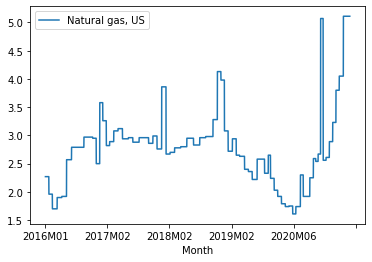

In [46]:
natural_gas_data_df1.plot(x= "Month", y="Natural gas, US")
plt.show()

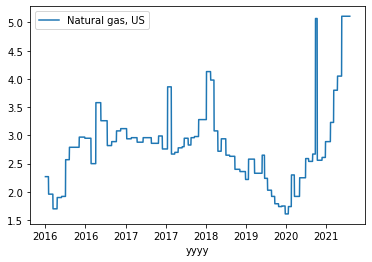

In [47]:
natural_gas_data_df2.plot(x= "yyyy", y="Natural gas, US")

In [ ]:
natural_gas_data_df1.plot.bar(x= "Month", y="Natural gas, US")

In [ ]:
natural_gas_data_df2.plot(x= "mm", y="Natural gas, US")
# adjust x-axis ticks here/define them / markers would look better in years

In [ ]:
natural_gas_data_df2.head()

In [ ]:
# Find outliers / create bins

In [ ]:
# contract toals
total_contract_amount = natural_gas_data_df2["total_obligated_amount"].sum()
total_contract_amount

In [ ]:
# agency names
agency_count = natural_gas_data_df2["funding_sub_agency_name"].unique()
agency_count

In [ ]:
agency_count = natural_gas_data_df2["funding_sub_agency_name"].value_counts()
agency_count

In [ ]:
# clean funding_sub_agency_name - repeating same agency name, reordering agency names
# Reorder Veterans Affairs & Dept of State - https://www.askpython.com/python-modules/pandas/update-the-value-of-a-row-dataframe | https://datagy.io/pandas-data-cleaning/
natural_gas_data_df2["funding_sub_agency_name"] = natural_gas_data_df2["funding_sub_agency_name"].str.replace("VETERANS AFFAIRS, DEPARTMENT OF", "DEPARTMENT OF VETERANS AFFAIRS")
natural_gas_data_df2.tail()

In [ ]:
#natural_gas_data_df2.replace("STATE, DEPARTMENT OF", 
          # "DEPARTMENT OF STATE", 
           #inplace=True)
#natural_gas_data_df2

In [ ]:
# clean repeating agency names


In [ ]:
contracts_per_agency = natural_gas_data_df2.set_index(["funding_sub_agency_name"])["total_obligated_amount"]
contracts_per_agency

In [ ]:
string = "DEFENSE LOGISTICS AGENCYDEFENSE LOGISTICS AGENCY"
len(string)

In [ ]:
print(len(string)/2)

In [ ]:
# print string from characters 0 - 24
print(string[:24])

In [ ]:
# Dataframe to use natural_gas_data_df2

In [ ]:
# Linear Regression
# Independent Variable (X) - contract price      Dependent Variable (Y) - natural gas price US
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on govt contract data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    print(r_value) 
    print(p_value)
    print("this is the r value", r_value)
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('US Govt Contract Value')
    plt.ylabel(y_label)
    plt.show()

  

In [ ]:
x_values = natural_gas_data_df2["Natural gas, US"]
y_values = natural_gas_data_df2["total_obligated_amount"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on US Govt Contracts \
                       for US Natural Gas Prices', 'Natural gas, US',(10, 40))

In [ ]:
# summarize dataframe w/ groupby / time / department/recipient | look at source of outliers
# p value not statistically significant | r-value is weak too
# not a strong linear relationship as is | adjust

In [ ]:
# Month vs Natural Gas Price Scatterplot
natural_gas_data_df2.plot.scatter(x = "yyyy", y = "Natural gas, US", s = 10, c = "blue")